In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_excel("ML-D1-LinearRegression.xlsx")
df

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


In [5]:
df.shape

(1338, 7)

In [6]:
df.columns

Index(['age', 'gender', 'BMI', 'Children', 'smoking_status', 'location',
       'health_insurance_price'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [8]:
df.dtypes

age                       float64
gender                     object
BMI                       float64
Children                    int64
smoking_status             object
location                   object
health_insurance_price    float64
dtype: object

In [9]:
df.duplicated().any()

np.True_

In [10]:
df.duplicated().sum()

np.int64(1)

In [11]:
df[df.duplicated()]

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
581,19.0,male,30.59,0,no,northwest,1639.5631


In [12]:
df1=df.drop_duplicates()

In [13]:
df1.shape

(1337, 7)

In [14]:
df1.isnull().any()

age                        True
gender                    False
BMI                        True
Children                  False
smoking_status            False
location                  False
health_insurance_price     True
dtype: bool

In [15]:
df1.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [33]:
df1=df1.dropna()

In [34]:
df1.shape

(1284, 7)

In [35]:
numeric_columns=df1.select_dtypes(include='number').columns.to_list()


In [36]:
print(numeric_columns)

['age', 'BMI', 'Children', 'health_insurance_price']


In [37]:
categorical_columns=df1.select_dtypes(exclude='number').columns.to_list()
categorical_columns

['gender', 'smoking_status', 'location']

In [38]:
df1.describe(include='object')

,gender,smoking_status,location
count,1284,1284,1284
unique,2,2,4
top,male,no,southeast
freq,651,1022,351


In [39]:
for i in categorical_columns:
    print(df1[i].value_counts())
    print()
    print("---------------------------------------------------")

gender
male      651
female    633
Name: count, dtype: int64

---------------------------------------------------
smoking_status
no     1022
yes     262
Name: count, dtype: int64

---------------------------------------------------
location
southeast    351
northeast    316
northwest    309
southwest    308
Name: count, dtype: int64

---------------------------------------------------


In [40]:
cond=df1[df1['location']=="southwest"]
cond1=cond.groupby('gender')['health_insurance_price'].mean()
cond1

gender
female    11181.111599
male      13590.071110
Name: health_insurance_price, dtype: float64

In [41]:
cond2=df.groupby('smoking_status')['health_insurance_price'].mean()
cond2

smoking_status
no      8437.935287
yes    32077.757594
Name: health_insurance_price, dtype: float64

In [42]:

cond3=df.groupby(['location','gender'])['health_insurance_price'].max()
cond3

location   gender
northeast  female    58571.07448
           male      48549.17835
northwest  female    55135.40209
           male      60021.39897
southeast  female    63770.42801
           male      62592.87309
southwest  female    48824.45000
           male      52590.82939
Name: health_insurance_price, dtype: float64

In [43]:
# 4. Which region is having lowest insurance cost for male and female
cond4=df1.groupby(['gender','location'])['health_insurance_price'].min()
cond4

gender  location 
female  northeast    2196.47320
        northwest    2117.33885
        southeast    1607.51010
        southwest    1727.78500
male    northeast    1694.79640
        northwest    1621.34020
        southeast    1121.87390
        southwest    1241.56500
Name: health_insurance_price, dtype: float64

In [44]:
# 5. average insurance cost for female with age greater than 35
cond5=df1[(df1['age']>35) & (df1['gender']=='female')]
cond5['health_insurance_price'].mean()

np.float64(15069.436895482093)

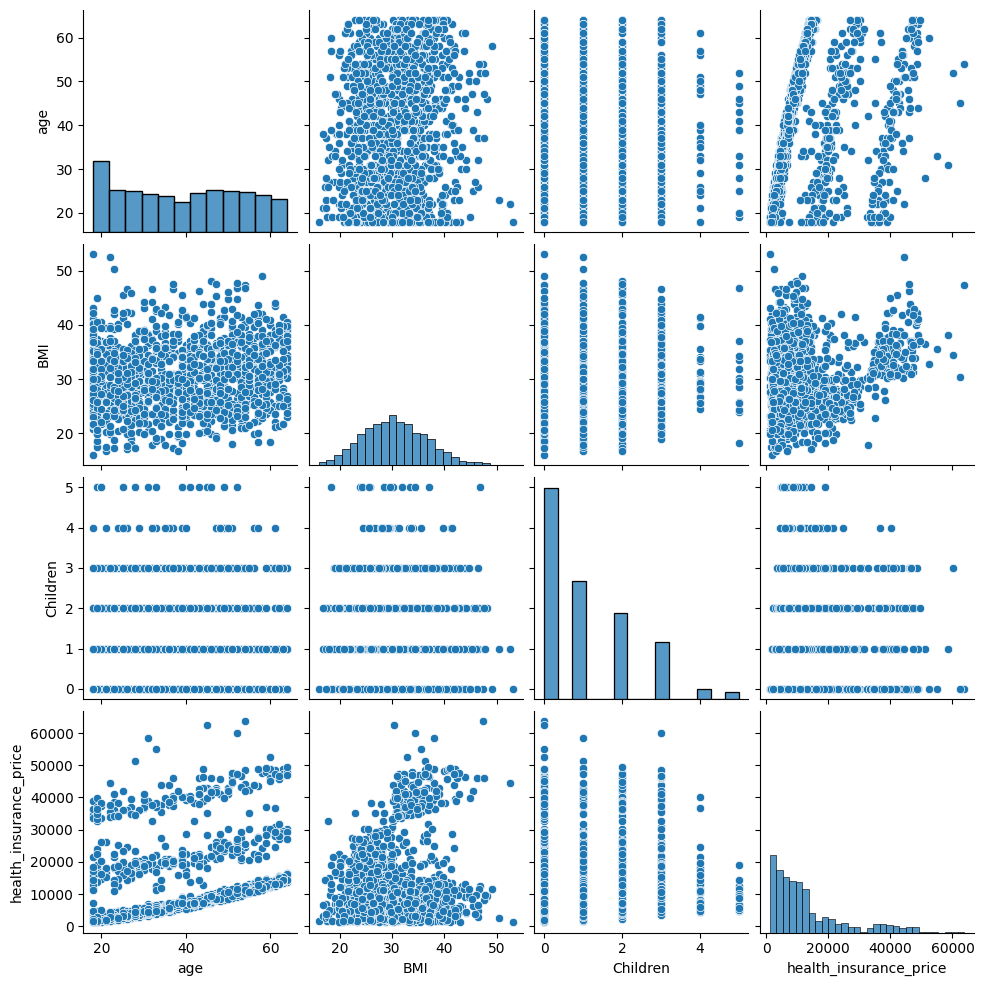

In [45]:
sns.pairplot(df1)
plt.show()

In [46]:
corr_data=df1[['age','BMI','health_insurance_price']].corr()
corr_data

,age,BMI,health_insurance_price
age,1.000000,0.110636,0.304755
BMI,0.110636,1.000000,0.196716
health_insurance_price,0.304755,0.196716,1.000000


<Axes: >

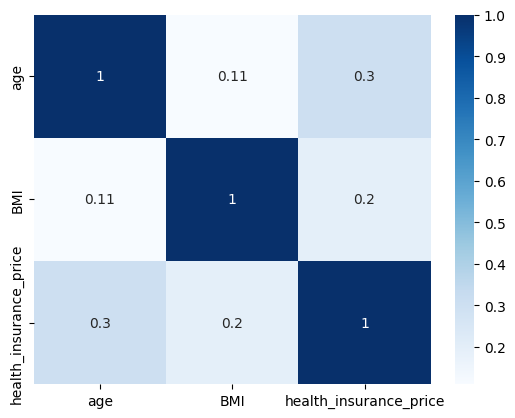

In [89]:
sns.heatmap(corr_data,annot=True,cmap='Blues')

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [48]:
df1['gender']=le.fit_transform(df1['gender'])
df1['smoking_status']=le.fit_transform(df1['smoking_status'])
df1['location']=le.fit_transform(df1['location'])

In [49]:
df1

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
1,18.0,1,33.770,1,0,2,1725.55230
2,28.0,1,33.000,3,0,2,4449.46200
3,33.0,1,22.705,0,0,1,21984.47061
4,32.0,1,28.880,0,0,1,3866.85520
5,31.0,0,25.740,0,0,2,3756.62160
...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3,0,1,10600.54830
1334,18.0,0,31.920,0,0,0,2205.98080
1335,18.0,0,36.850,0,0,2,1629.83350
1336,21.0,0,25.800,0,0,3,2007.94500


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [51]:
x=df1.drop('health_insurance_price',axis=1)
y=df1['health_insurance_price']

In [52]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("\nTraining Shape:",X_train.shape)
print("\nTesting Shape:",X_test.shape)



Training Shape: (1027, 6)

Testing Shape: (257, 6)


In [53]:
model=LinearRegression()
model.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [54]:
coff_df=pd.DataFrame(model.coef_,x.columns,columns=['Coefficient'])
print(coff_df)
print("intercept:",model.intercept_)

                 Coefficient
age               258.233190
gender             79.378199
BMI               303.627746
Children          429.046341
smoking_status  23776.373395
location         -360.080370
intercept: -11105.20627831053


In [55]:
y_pred=model.predict(X_test)


In [56]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("Mean Absolute error:",mae)
print("Mean Squared error:",mse)
print("R2 Score:",r2)

Mean Absolute error: 4409.498094856371
Mean Squared error: 44056509.986951105
R2 Score: 0.7265596371524727


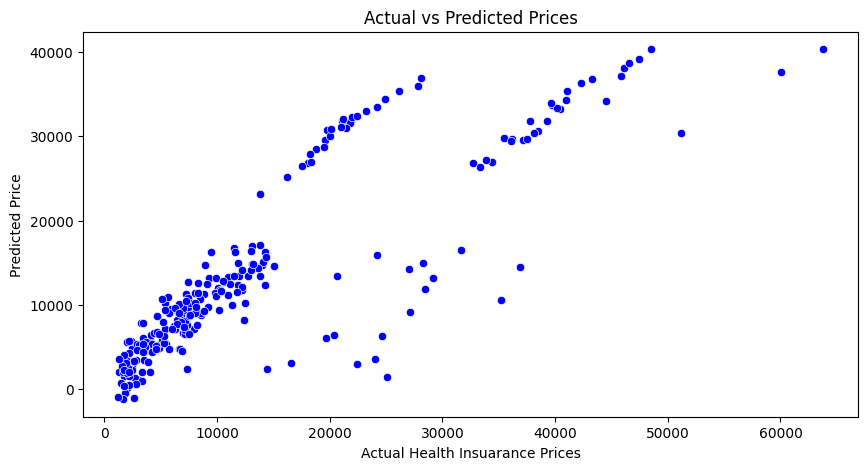

In [57]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test,y=y_pred,color='blue')
plt.xlabel("Actual Health Insuarance Prices")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

In [ ]:
#1 save the csv or excel file for the 80 and 20 % data used for trainng

In [ ]:
#2 find another method to use sequencial data for training and testing without using random_state
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=False)
print("\nTraining Set:",X_train)




Training Set:        age  gender     BMI  Children  smoking_status  location
1     18.0       1  33.770         1               0         2
2     28.0       1  33.000         3               0         2
3     33.0       1  22.705         0               0         1
4     32.0       1  28.880         0               0         1
5     31.0       0  25.740         0               0         2
...    ...     ...     ...       ...             ...       ...
1064  29.0       0  25.600         4               0         3
1065  42.0       0  25.300         1               0         3
1066  48.0       1  37.290         2               0         2
1067  39.0       1  42.655         0               0         0
1068  63.0       1  21.660         1               0         1

[1027 rows x 6 columns]
